**SOCIAL NETWORKS LAB**

Implement community detection algorithms on a social network ??

Community detection algorithms are used to identify cohesive groups or communities within a social network. Python provides several libraries that implement these algorithms.
*   Newman-Girvan algorithm
*   Louvain algorithm






## **Newman-Girvan algorithm**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


In [ ]:
# Step 1: Load the text dataset
with open('/content/group.csv', 'r') as file:
    documents = file.readlines()


In [ ]:
# Step 2: Preprocess the text data
stop_words = set(stopwords.words('english'))  # Set of stopwords
processed_documents = []
for document in documents:
    # Tokenize the document into words
    tokens = word_tokenize(document.lower())
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Join the processed tokens back into a document string
    processed_document = ' '.join(tokens)
    processed_documents.append(processed_document)



In [ ]:
# Step 3: Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)


In [ ]:
# Step 4: Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5)  # Assuming 5 topics
lda.fit(X)


LatentDirichletAllocation(n_components=5)

In [ ]:

# Step 5: Extract topic distributions for documents
topic_dist = lda.transform(X)
topic_labels = topic_dist.argmax(axis=1)


In [ ]:
# Step 6: Create a graph representation of the documents
G = nx.Graph()
for i, document in enumerate(documents):
    G.add_node(i, text=document, topic=topic_labels[i])


In [ ]:
# Step 7: Apply the Girvan-Newman algorithm for community detection
communities = nx.community.girvan_newman(G)


In [ ]:
# Step 8: Get the final community partition
partition = next(communities)


In [ ]:
# Step 9: Visualize the graph with community colors
pos = nx.spring_layout(G)


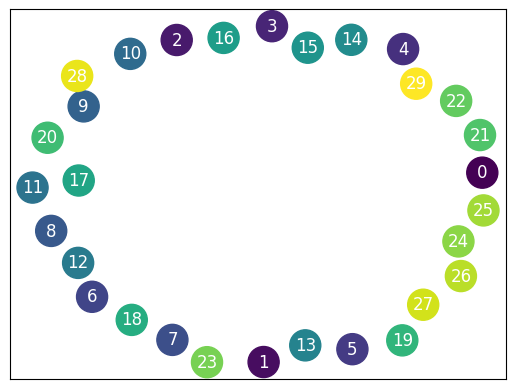

In [ ]:
# Draw nodes with different community colors
node_colors = [idx for idx, comm in enumerate(partition) for _ in comm]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='viridis', node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_color='white')

# Show the plot
plt.axis('ON')
plt.show()


## **INSIGHTS : Newman-Girvan algorithm**


The Girvan-Newman algorithm, often known as the edge betweenness algorithm, is a popular community finding tool for networks. Mark Newman and Michelle Girvan created it in 2002.The technique assesses "edge betweenness centrality," the value of edges in connecting communities. Edges with high betweenness centrality are more likely to lie between communities, making them potential borders.

Newman-Girvan algorithm steps:

  o	Calculate betweenness centrality for all network edges. This requires finding the shortest pathways between all pairs of nodes and counting how many travel via each edge.

  o	Remove the network's most betweenness-centralized edge. This splits the network.

  o	Calculate the revised network's remaining edges' betweenness centrality.

  o	Repeat steps 2 and 3 until all edges are removed or a desired number of communities are found.

  o	Disconnected components form communities or subnetworks


## **Louvain algorithm**

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from community import community_louvain
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [ ]:
# Step 1: Load the text dataset
# Assuming you have a .txt file named 'dataset.txt' containing one document per line
with open('/content/group.csv', 'r') as file:
    documents = file.readlines()


In [ ]:
# Step 2: Preprocess the text data
stop_words = set(stopwords.words('english'))  # Set of stopwords
processed_documents = []
for document in documents:
    # Tokenize the document into words
    tokens = word_tokenize(document.lower())
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Join the processed tokens back into a document string
    processed_document = ' '.join(tokens)
    processed_documents.append(processed_document)


In [ ]:
# Step 3: Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)


In [ ]:
# Step 4: Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5)  # Assuming 5 topics
lda.fit(X)


LatentDirichletAllocation(n_components=5)

In [ ]:
# Step 5: Extract topic distributions for documents
topic_dist = lda.transform(X)
topic_labels = topic_dist.argmax(axis=1)


In [ ]:
# Step 6: Create a graph representation of the documents
G = nx.Graph()
for i, document in enumerate(documents):
    G.add_node(i, text=document, topic=topic_labels[i])


In [ ]:
# Step 7: Apply the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)


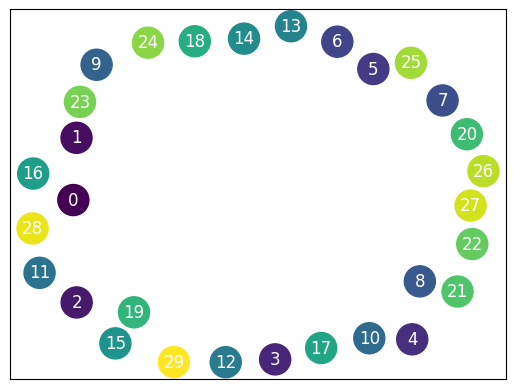

In [ ]:
# Step 8: Visualize the graph with community colors
pos = nx.spring_layout(G)
# Get unique community labels
community_labels = set(partition.values())

# Draw nodes with different community colors
node_colors = [partition[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='viridis', node_size=500)

# Draw edges with community colors
edge_colors = ['blue' if partition[edge[10]] != partition[edge[20]] else 'viridis' for edge in G.edges()]
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color= 'jet')

# Draw node labels
nx.draw_networkx_labels(G, pos, font_color='white')

# Show the plot
plt.axis('on')
plt.show()


**INSIGHTS : Louvain algorithm**

Popular community detection algorithm Louvain finds a network's modular structure. Iteratively merging and reassigning nodes to communities optimises network modularity.


General Louvain algorithm steps:

o	Initialization:
  Assign each network node a community.
  Calculate current network modularity. Modularity evaluates network community quality. It compares community edges to random network edges.

o	Iteration:
  Calculate the modularity gain of relocating each node to a neighbouring community. Moving the node increases modularity.

o	Place the node in the modularity-maximizing community. Leave the node in its current community if all neighbouring communities have negative or zero modularity gain.

o	Repeat the above for all network nodes.

o	Community aggregation: Each community becomes a node in a new network after one pass over all nodes. Edge weights between communities are the total of the original edges between nodes in the communities.





